### PSet1 MSB - Gonçalo Braga

##### Exercise 1
$$\require{mhchem}$$       

So we have 
$$
\ce{A_{o} + B_{c} <=>[v_{1}][v_{-1}] A_{c} + B_{o}}
$$
$$
\ce{F_{o} + G_{c} <=>[v_{2}][v_{-2}] F_{c} + G_{o}}
$$
$$
\ce{A_{c} + F_{c} + X_{c} ->[v_{3}] B_{c} + G_{c}}
$$
$$
\ce{B_{o} + G_{o} ->[v_{4}] A_{o} + F_{o} + X_{o}}
$$

In [1]:
""" 
Regarding the stoichiometric matrix
We have 10 species, and 6 fluxes
These respective fluxes would be ordered
as v1, v-1, v2, v-2, v3 and v4 in N
"""
import numpy as np
species = ["Ao", "Ac", "Bo", "Bc", "Fo", "Fc",
          "Go", "Gc", "Xo", "Xc"]

N = np.array([[-1, 1, 0, 0, 0, 1], [1, -1, 0, 0, -1, 0],
             [1, -1, 0, 0, 0, -1], [-1, 1, 0, 0, 1, 0],
             [0, 0, -1, 1, 0, 1], [0, 0, 1, -1, -1, 0],
             [0, 0, 1, -1, 0, -1], [0, 0, -1, 1, 1, 0],
             [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, -1, 0]])
N

array([[-1,  1,  0,  0,  0,  1],
       [ 1, -1,  0,  0, -1,  0],
       [ 1, -1,  0,  0,  0, -1],
       [-1,  1,  0,  0,  1,  0],
       [ 0,  0, -1,  1,  0,  1],
       [ 0,  0,  1, -1, -1,  0],
       [ 0,  0,  1, -1,  0, -1],
       [ 0,  0, -1,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, -1,  0]])

As for mass balance equations

Regarding conservation relationships

In [2]:
np.linalg.matrix_rank(N) # Such that there are 6-4 = 2 conservation
# relationships to look for

4

In [3]:
from scipy.linalg import null_space
C = null_space(N)
C

array([[ 6.63601312e-02,  7.03986032e-01],
       [ 6.63601312e-02,  7.03986032e-01],
       [ 7.03986032e-01, -6.63601312e-02],
       [ 7.03986032e-01, -6.63601312e-02],
       [-1.14491749e-16,  5.55111512e-17],
       [-1.70002901e-16,  5.55111512e-17]])

In [4]:
for k in range(C.shape[1]):
    vals = []
    for i in range(len(C)):
        if abs(C[i, k]) >= 1e-2 and C[i, k] != 0: #here choosing an arbitrary threshold
            vals.append(f"{C[i, k]:.2f} {species[i]}")
    print(" + ".join(vals))


#Although we are only expecting two conservation relationships

0.07 Ao + 0.07 Ac + 0.70 Bo + 0.70 Bc
0.70 Ao + 0.70 Ac + -0.07 Bo + -0.07 Bc


##### Exercise 2

We have that A and B bind with $K$. Furthermore, $[A]_{total} = [A]_{free} + [AB] = 2K = [B]_{total}$. Moreover, $K = \frac{[A][B]}{[AB]}$, such that $[A]_{free} = 2K - [AB]$, and equivalently $[B]_{free} = 2K - [AB]$.

Substituting these expressions for $[A]_{free}$ and $[B]_{free}$, in $K$, we get
$$
K = \frac{(2K - [AB])^{2}}{[AB]}
$$
$$
\Leftrightarrow K = \frac{4K^{2} - 4K[AB] + [AB]^{2}}{[AB]}
$$
$$
\Leftrightarrow [AB]^{2} - 5K[AB] + 4K^{2} = 0
$$
$$
\Leftrightarrow [AB] = \frac{5K \pm 3K}{2}
$$
and we take $[AB] = K$, since the other solution $[AB] = 4K > 2K = [A]_{total}$. As such, the fraction of bound A is
$$
[A]_{bound} = \frac{[AB]}{[A]_{total}} = \frac{K}{2K} = 1/2
$$

-------
As for the plotting of bound fraction of A versus, total concentration of B. As B increases, as long as the total concentration of A is $2K$, such fraction is going to be 1/2, when $[B]_{total} = 2K$, and is inherently going to 1 as $[B]_{total}$ increases. We are also assuming no significant fluctuations coming from the dissociation of the AB complex.



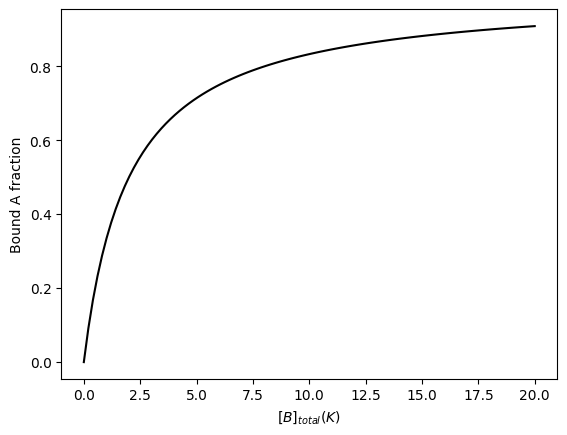

In [5]:
import matplotlib.pyplot as plt

B_total = np.linspace(0, 20, 100)  

frac_A_bound = B_total / (B_total + 2)

plt.plot(B_total, frac_A_bound, "k")
plt.xlabel("$[B]_{total}(K)$")
plt.ylabel("Bound A fraction")
plt.show()


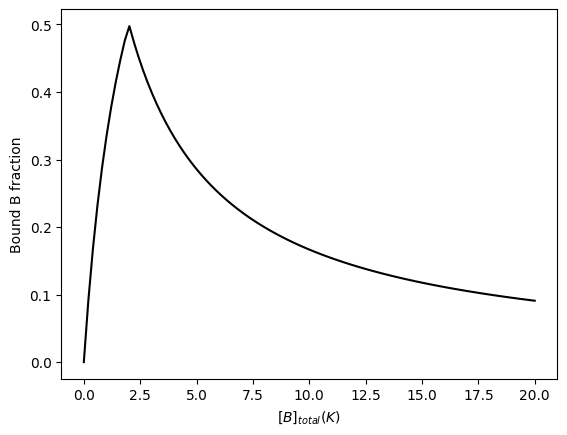

In [6]:
"""
Here one would presume the fraction of B bound would increase initially reaching 1/2 when [B] = 2K
and decreasing readily after that with the increase of [B] total, not being able to bind to a fixed
[A] = 2K.
"""

B_total = np.linspace(0, 20, 100)

frac_B_bound = [B / (B + 2) if B < 2 else 1 - (B / (B + 2)) for B in B_total] #Although with linear decrease

plt.plot(B_total, frac_B_bound, "k")
plt.xlabel("$[B]_{total}(K)$")
plt.ylabel("Bound B fraction")
plt.show()

-------------------
Given that the rate constant for the specific association reaction between two proteins rarely exceeds
$10^{6}\,M^{-1}s^{-1}$, and that $K = 1\,\mu M$, and $t_{1/2} = \frac{\ln(2)}{k_{dis}}$, a lower bound for the complexes'
half-life would be $t_{1/2} \gtrapprox 0.693\,s$.

##### Exercise 3